# Using K nearest neigbours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# model validation
from sklearn.metrics import accuracy_score
# model validation
from sklearn.metrics import log_loss

In [3]:
train_labels = pd.read_csv("./data/train_labels.csv", header=None)
train_data = pd.read_csv("./data/train_data.csv", header=None)

### Scale

Center to the mean and component wise scale to unit variance.

In [4]:
# scale
scaled_features = preprocessing.scale(train_data)
pd.DataFrame(scaled_features).head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,-1.571333,-1.423949,-0.935285,-1.169432,-0.772396,-1.258998,-0.811812,-0.985136,-0.581884,-0.756522,...,1.279245,1.266232,-0.158097,0.297566,0.164625,0.499226,0.921775,-0.185416,0.092879,0.006096
1,-0.602171,0.267213,0.055395,-0.711935,-1.073589,-0.876857,-0.373028,0.155161,0.399480,0.963212,...,-0.897103,-0.852736,0.074136,1.103637,0.111916,-0.726099,0.269456,-1.177036,-0.694615,-0.223800
2,-0.584983,0.148239,0.606352,0.806748,0.075890,-0.140405,-0.116555,0.220999,-0.266751,-0.562176,...,-0.406852,1.244176,0.375294,1.291144,0.824687,2.770780,-0.179373,-0.786025,0.560227,-0.548004
3,0.193432,1.292285,0.854470,0.486911,0.341579,0.529897,0.640292,0.450361,0.375602,0.654629,...,-0.975856,0.528008,-0.661580,0.903560,-1.144311,0.899273,-1.229087,0.110236,2.960029,-0.956088
4,-0.825078,-0.712986,-0.865418,-1.029277,-1.073589,-1.243794,-0.874860,-1.021802,-0.959120,-0.545164,...,-0.189255,1.433153,-0.525024,-1.507232,-0.966014,-0.535219,-0.432634,-1.336981,-1.421282,0.632431


In [5]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, train_labels[0], test_size=0.30)

**Create a KNN model instance with n_neighbors=1**

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
accuracy_score(y_true=y_test, y_pred=pred)

# sucks

0.4988540870893812

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [29]:
error_rate = []
accuracy = []
log_loss_list = []

# Will take some time
for i in range(1,40):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    proba_i = knn.predict_proba(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    accuracy.append(np.mean(pred_i == y_test))
    log_loss_list.append(log_loss(y_true=y_test, y_pred=proba_i))

Max accuracy = 0.5912910618792971 when k = 13
Min log loss = 2.2254568047920857 when k = 35


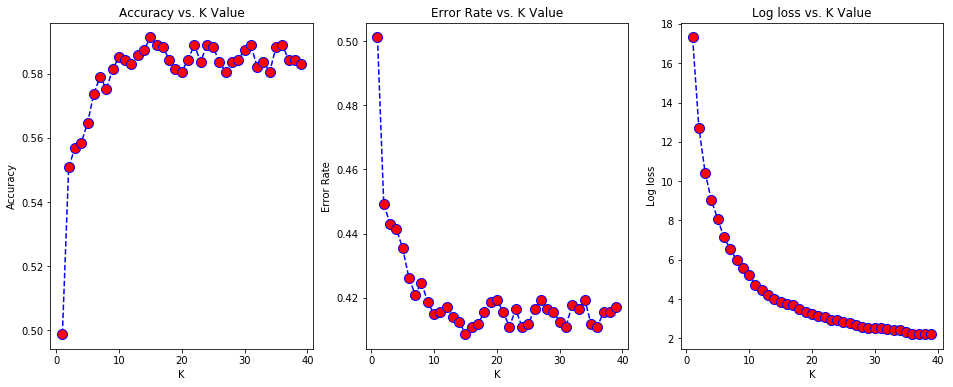

In [31]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,6))

axes[0].plot(range(1,40),accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
axes[0].set_title('Accuracy vs. K Value')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Accuracy')

axes[1].plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
axes[1].set_title('Error Rate vs. K Value')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Error Rate')

axes[2].plot(range(1,40),log_loss_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
axes[2].set_title('Log loss vs. K Value')
axes[2].set_xlabel('K')
axes[2].set_ylabel('Log loss')

best = max(accuracy)
smallest = min(log_loss_list)
print(f'Max accuracy = {best} when k = {accuracy.index(best)-1}')
print(f'Min log loss = {smallest} when k = {log_loss_list.index(smallest)-1}')

In [32]:
# NOW WITH K=15

k = 15
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
accuracy_score(y_true=y_test, y_pred=pred)

0.5912910618792971

In [33]:
pred_proba = knn.predict_proba(X_test)

In [39]:
## k = 35
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
pred_with_proba = knn.predict_proba(X_test)
log_loss(y_true=y_test, y_pred=pred_with_proba)

2.339856261984364

# proba on submission data

### train on full data set

In [41]:
test_data = pd.read_csv("./data/test_data.csv", header=None)
test_data.shape

(6544, 264)

In [42]:
## k = 35
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(scaled_features, train_labels[0])

submission_proba = knn.predict_proba(test_data)

In [44]:
dummy = pd.read_csv("./data/dummy_solution_accuracy.csv")
dummy.drop("Sample_label", inplace=True, axis=1)

submission2 = dummy.copy()
for i in range(10):
    submission2[f'Class_{i+1}'] = submission_proba[:, i]
    
submission2.head()

,Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10
0,1,0.514286,0.000000,0.200000,0.0,0.142857,0.114286,0.0,0.028571,0.0,0.0
1,2,0.400000,0.114286,0.228571,0.0,0.085714,0.142857,0.0,0.028571,0.0,0.0
2,3,0.371429,0.171429,0.171429,0.0,0.114286,0.142857,0.0,0.028571,0.0,0.0
3,4,0.857143,0.000000,0.028571,0.0,0.085714,0.000000,0.0,0.028571,0.0,0.0
4,5,0.742857,0.000000,0.114286,0.0,0.085714,0.028571,0.0,0.028571,0.0,0.0


In [45]:
submission2.to_csv("./submission/logloss_knn.csv", index=False)